In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [4]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [5]:
# place your code here
X_real_zeros = X[numeric_cols].fillna(0)
X_cat = X[categorical_cols].fillna("NA").astype('str')

In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [7]:
from sklearn.cross_validation import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

D:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
from sklearn import metrics
estimator = LogisticRegression()

In [11]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
X_train_real_zeros_oh = scaler.fit_transform(X_train_real_zeros)
X_train_real_scaled = scaler.transform(X_train_real_zeros_oh)
X_test_real_zeros_oh = scaler.fit_transform(X_test_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros_oh)

del X_train_real_zeros_oh
del X_test_real_zeros_oh

In [21]:
def write_answer_3(auc_1, auc_2):
    auc = (auc_1 + auc_2) / 2
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here
train_data = np.hstack((X_train_real_scaled, X_train_cat_oh))
test_data = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [12]:
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv)
optimizer.fit(train_data, y_train.values)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'C': 0.1}


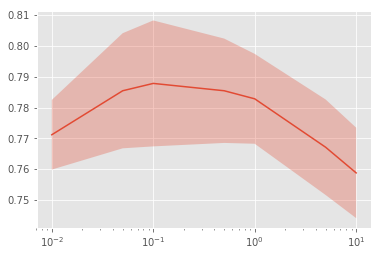

In [14]:
print optimizer.best_params_
plot_scores(optimizer)

In [13]:
probability_predictions = optimizer.best_estimator_.predict_proba(test_data)
auc_1 = metrics.roc_auc_score(y_test, probability_predictions[:,1])
print auc_1

0.885771965883


In [22]:
np.random.seed(0)
size = np.sum(y_train==0) - np.sum(y_train==1)
indices_to_add = np.random.randint(np.sum(y_train==1), size = size) # size = np.sum(y_train==0) - np.sum(y_train==1)
X_train_to_add = train_data[y_train.as_matrix() == 1,:][indices_to_add,:]

In [17]:
np.random.seed(0)
number_to_add = np.sum(y_train == 0) - np.sum(y_train == 1)
indices_to_add = np.random.randint(np.sum(y_train == 1), size=number_to_add)
X_train_to_add = train_data[y_train.as_matrix() == 1, :][indices_to_add, :]

TypeError: unhashable type: 'numpy.ndarray'

или так я делаю

In [16]:
size = np.sum(y_train==0) - np.sum(y_train==1)
np.random.seed(0)
indices_to_add = np.random.randint(np.sum(y_train==1), size = size)
example2 = train_data[y_train.as_matrix() == 1] # отдельно так делаю, чтоб ошибки как сверху не было
X_train_to_add = example2.loc[indices_to_add,:]
print X_train_to_add.shape, type(X_train_to_add)

(432, 5606) <class 'pandas.core.frame.DataFrame'>


In [17]:
del example2

In [18]:
example_data_train = np.vstack([train_data, X_train_to_add])
y_train_to_add = np.ones((size, 1))
example_labels_train = np.vstack([y_train, y_train_to_add])

ValueError: all the input array dimensions except for the concatenation axis must match exactly